# **PUBG DATA ANALYSIS**

This is the Pubg Analysis which explores the game features and players preferences. A complete Preprocessing is done on the Data, Removed Outliers using IQR and dropped Null Values

We have two datasets which explains PUBG in different perspectives.The first one is the Aggregate data where columns are match_mode, party_size, player_assists, player_dbno, player_dist_ride, player_dist_walk, player_dmg, player_kills.

The another dataset we have is Kill Data which contains the players kill position, victim position, placement_rate, team_id, player_mode, game_size, party_size.

In [1]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# READING THE 1st DATASET OF AGGREGATE FILE
df1 = pd.read_csv("agg_match_stats_4.csv")

## > INFO ON THE DATASET

Explaining every column for Aggregate and the type of data it has:-

1.   **date**-Start time of the game- Nominal
2.   **game_size**-size of the game map-Discrete
3.    **match_id**	Event Unique ID	Nominal
4.    **match_mode**	Game Mode (First/Third Person View)	Nominal
5.    **party_size**	Squad size (1 person/2 people/4 people)	Discrete
6.    **player_assists**	Rescue teammates	Discrete
7.    **player_dbno**	Number of times the player was knocked down	Discrete
8.    **player_dist_ride**	Driving Distance	Continuous
9.    **player_dist_walk**	Walking distance	Continuous
10.   **player_dmg**	Injury points	Discrete
11.   **player_kills**	kills	Discrete
12.   **player_name**	Player Game id	Nominal
13.   **player_survive_time**	Player survival time	Continuous
14.   **team_id**	The player’s team number	Discrete
15.  **team_placement**	The final ranking of the player’s team	Discrete


In [3]:
df1.head()

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,37.919838,20,0,m3xdave,106.351,100000,88
1,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,292.205048,3457.036130,387,3,UDaddyHere,1690.021,100006,8
2,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,106.215900,0,0,Dummy05,103.415,100010,89
3,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,126.959831,91,0,NA-Wuyifan,272.838,100019,67
4,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,43.346710,0,0,kickinchicken,134.342,100024,81


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11993485 entries, 0 to 11993484
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 object 
 1   game_size            int64  
 2   match_id             object 
 3   match_mode           object 
 4   party_size           int64  
 5   player_assists       int64  
 6   player_dbno          int64  
 7   player_dist_ride     float64
 8   player_dist_walk     float64
 9   player_dmg           int64  
 10  player_kills         int64  
 11  player_name          object 
 12  player_survive_time  float64
 13  team_id              int64  
 14  team_placement       int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 1.3+ GB


In [5]:
# CALCULATING THE TOTAL NULL VALUES
df1.isnull().sum()

date                       0
game_size                  0
match_id                   0
match_mode                 0
party_size                 0
player_assists             0
player_dbno                0
player_dist_ride           0
player_dist_walk           0
player_dmg                 0
player_kills               0
player_name            17450
player_survive_time        0
team_id                    0
team_placement             0
dtype: int64

## > **DATA CLEANING (EDA)** FOR df1

In [6]:
# fill null values for game_size
df1.game_size.mean()
df1.game_size = df1.game_size.fillna(df1.game_size.mean())
# fill null values for match_mode
df1.match_mode.mode()
df1.match_mode = df1.match_mode.fillna("tpp")
# fill null values for party_size
df1.party_size.median()
df1.party_size = df1.party_size.fillna(df1.party_size.median())
# fill null values for player_assists
df1.player_assists.median()
df1.player_assists = df1.player_assists.fillna(df1.player_assists.median())
# fill null values for player_dbno
df1.player_dbno.median()
df1.player_dbno = df1.player_dbno.fillna(df1.player_dbno.median())
# fill null values for player_dist_ride
df1.player_dist_ride.median()
df1.player_dist_ride = df1.player_dist_ride.fillna(df1.player_dist_ride.median())
# fill null values for player_dist_walk
df1.player_dist_walk.mean()
df1.player_dist_walk = df1.player_dist_walk.fillna(df1.player_dist_walk.mean())
# fill null values for player_dmg
df1.player_dmg.median()
df1.player_dmg = df1.player_dmg.fillna(df1.player_dmg.median())
# fill null values for player_kills
df1.player_kills.median()
df1.player_kills = df1.player_kills.fillna(df1.player_kills.median())
# fill null values for player_survive_time
df1.player_survive_time.median()
df1.player_survive_time = df1.player_survive_time.fillna(df1.player_survive_time.median())
# fill null values for team_id
df1.team_id.mode()
df1.team_id = df1.team_id.fillna(12.0)
# fill null values for team_placement
df1.team_placement.median()
df1.team_placement = df1.team_placement.fillna(df1.team_placement.median())

In [7]:
# REVIEWING THE TOTAL NULL VALUES
df1.isna().sum()

date                       0
game_size                  0
match_id                   0
match_mode                 0
party_size                 0
player_assists             0
player_dbno                0
player_dist_ride           0
player_dist_walk           0
player_dmg                 0
player_kills               0
player_name            17450
player_survive_time        0
team_id                    0
team_placement             0
dtype: int64

In [8]:
df1.describe()

,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,team_placement
count,1.199348e+07,1.199348e+07,1.199348e+07,1.199348e+07,1.199348e+07,1.199348e+07,1.199348e+07,1.199348e+07,1.199348e+07,1.199348e+07,1.199348e+07
mean,4.721213e+01,2.730231e+00,2.293102e-01,5.833799e-01,1.155432e+03,1.284238e+03,1.239037e+02,8.871804e-01,1.440698e+05,2.095251e+04,2.449191e+01
std,2.523244e+01,1.247014e+00,5.748931e-01,1.117574e+00,2.001895e+03,4.208765e+03,1.693426e+02,1.552711e+00,9.549612e+07,4.069121e+04,2.041086e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.700000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.096169e+02,0.000000e+00,0.000000e+00,2.469700e+02,1.100000e+01,1.000000e+01
50%,4.300000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.489113e+02,7.700000e+01,0.000000e+00,6.531590e+02,2.200000e+01,2.000000e+01
75%,5.000000e+01,4.000000e+00,0.000000e+00,1.000000e+00,1.897827e+03,2.059376e+03,1.740000e+02,1.000000e+00,1.300038e+03,4.400000e+01,3.200000e+01
max,1.000000e+02,4.000000e+00,1.100000e+01,4.800000e+01,4.545110e+05,1.194823e+06,6.455000e+03,6.800000e+01,6.364822e+10,1.001230e+05,1.000000e+02


In [9]:
# READING THE 1st DATASET OF KILL FILE
df2 = pd.read_csv("kill_match_stats_final_0.csv")

## > INFO ON THE OTHER DATASET

Explaining every Column for Kill and the type of data it has:-

1. **killed_by**-Which weapon is killed-Nominal
2. **killer_name**-Killer game id-Nominal
3. **killer_placement**-The final ranking of the team where the killer is located-Discrete
4. **killer_position_x**-X coordinate of the killer when the killing behavior occurs-Continuous
5. **killer_position_y**-The Y coordinate of the killer when the killing behavior occurs-Continuous
6. **map**-Game Map (ERANGEL ISLAND/MIRAMAR DESERT)-Nominal
7. **match_id**-Event Unique ID-Nominal
8. **time**-When the kill occurs (how many seconds after the game starts)-Discrete
9. **victim_name**-The killed game id-Nominal
10. **victim_placement**-The final ranking of the team where the killer is located-Discrete
11. **victim_position_x**-X coordinate of the person being killed when the killing occurs-Continuous
12. **victim_position_y**-The Y coordinate of the killer at the time of the killing behavior-Continuous

In [10]:
df2.head()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,Grenade,KrazyPortuguese,5.0,657725.10,146275.2,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,KrazyPortuguese,5.0,657725.10,146275.2
1,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,92238.68,723375.1
2,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.50,421216.1
3,Down and Out,Weirdo7777,9.0,472014.20,313274.8,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,BlackDpre,13.0,476645.90,316758.4
4,M416,Solayuki1,9.0,473357.80,318340.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,Vjolt,13.0,473588.50,318418.8


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13426348 entries, 0 to 13426347
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   killed_by          object 
 1   killer_name        object 
 2   killer_placement   float64
 3   killer_position_x  float64
 4   killer_position_y  float64
 5   map                object 
 6   match_id           object 
 7   time               int64  
 8   victim_name        object 
 9   victim_placement   float64
 10  victim_position_x  float64
 11  victim_position_y  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.2+ GB


In [12]:
# CALCULATING THE TOTAL NULL VALUES
df2.isnull().sum()

killed_by                 0
killer_name          928630
killer_placement     928630
killer_position_x    928630
killer_position_y    928630
map                  162729
match_id                  0
time                      0
victim_name               0
victim_placement     251514
victim_position_x         0
victim_position_y         0
dtype: int64

 ## > **DATA CLEANING (EDA)** FOR df2

In [13]:
# fill null values for killer_placement
df2.killer_placement.median()
df2.killer_placement = df2.killer_placement.fillna(df2.killer_placement.median())
# fill null values for killer_position_x
df2.killer_position_x.mean()
df2.killer_position_x = df2.killer_position_x.fillna(df2.killer_position_x.mean())
# fill null values for killer_position_y
df2.killer_position_y.mean()
df2.killer_position_y = df2.killer_position_y.fillna(df2.killer_position_y.mean())
# fill null values for map
df2.map.mode()
df2.map = df2.map.fillna("ERANGEL")
# fill null values for victim_placement
df2.victim_placement.median()
df2.victim_placement = df2.victim_placement.fillna(df2.victim_placement.median())
# fill null values for victim_position_x
df2.victim_position_x.mean()
df2.victim_position_x = df2.victim_position_x.fillna(df2.victim_position_x.mean())
# fill null values for victim_position_y
df2.victim_position_y.mean()
df2.victim_position_y = df2.victim_position_y.fillna(df2.victim_position_y.mean())

In [14]:
# REVIEWING THE TOTAL NULL VALUES
df2.isna().sum()

killed_by                 0
killer_name          928630
killer_placement          0
killer_position_x         0
killer_position_y         0
map                       0
match_id                  0
time                      0
victim_name               0
victim_placement          0
victim_position_x         0
victim_position_y         0
dtype: int64

In [15]:
df2.describe()

,killer_placement,killer_position_x,killer_position_y,time,victim_placement,victim_position_x,victim_position_y
count,1.342635e+07,1.342635e+07,1.342635e+07,1.342635e+07,1.342635e+07,1.342635e+07,1.342635e+07
mean,1.463917e+01,4.121775e+05,3.951829e+05,7.608323e+02,2.533784e+01,3.953580e+05,3.795966e+05
std,1.452770e+01,1.376264e+05,1.351315e+05,5.569968e+02,2.009194e+01,1.610770e+05,1.570406e+05
min,1.000000e+00,0.000000e+00,-1.068467e+04,2.800000e+01,1.000000e+00,-8.192627e+04,-2.190362e+05
25%,4.000000e+00,3.442455e+05,3.006396e+05,2.420000e+02,1.100000e+01,3.143027e+05,2.878921e+05
50%,1.000000e+01,4.121775e+05,3.951829e+05,6.250000e+02,2.100000e+01,4.067448e+05,3.791542e+05
75%,2.000000e+01,4.942915e+05,4.749908e+05,1.249000e+03,3.300000e+01,5.012601e+05,4.792220e+05
max,9.900000e+01,8.140032e+05,8.149539e+05,2.374000e+03,1.000000e+02,9.302333e+05,8.152096e+05


## > IDENTIFYING OUTLIERS USING BOXPLOT FOR AGGREGATE DATA AND KILL DATA

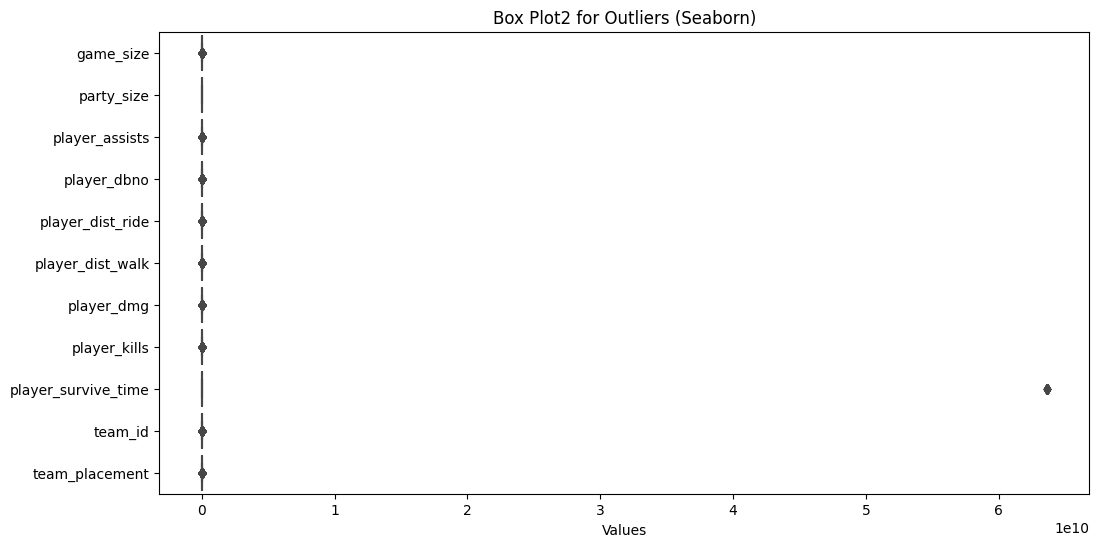

In [16]:
# Creating a box plot for each column to check the outliers using Seaborn for df1
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, orient='h')
plt.xlabel('Values')
plt.title('Box Plot2 for Outliers (Seaborn)')
plt.show()

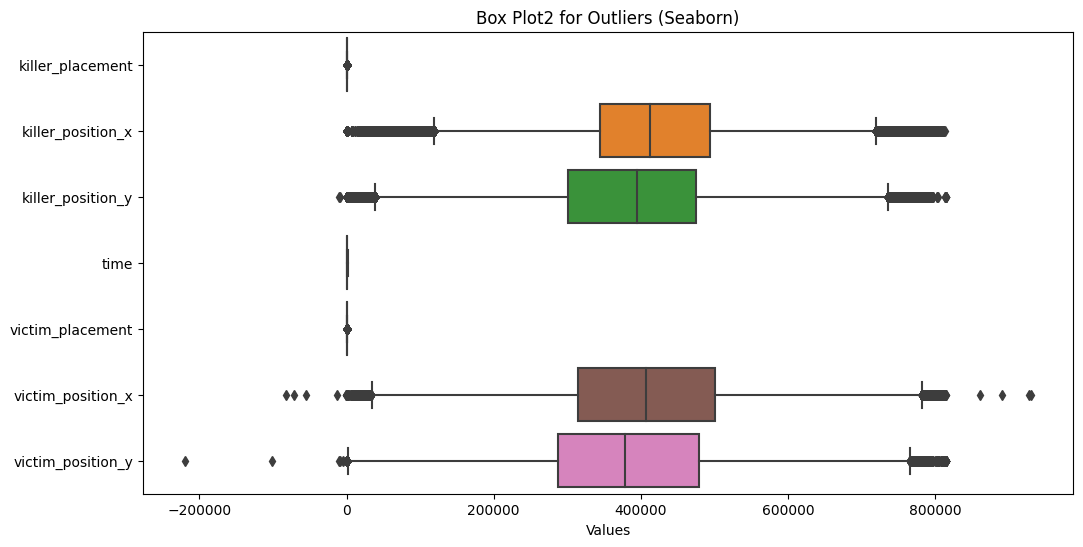

In [17]:
# Creating a box plot for each column to check the outliers using Seaborn for df2
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, orient='h')
plt.xlabel('Values')
plt.title('Box Plot2 for Outliers (Seaborn)')
plt.show()

## > EXTRACTING NUMERIC COLUMNS FOR BOTH DATASETS 
Extracting Numeric Columns from the dataset will replace original values with Nan values in the dataset after removing the Outliers. These variables will contain Outliers and we can drop them and the remaining instances can be used for further Model Building and Evaluation. This model will help us for prediction.
Numeric columns often contain valuable information that helps you interpret the significance of an outlier.
Before Model Building and Evaluation we need to Standardize the data by using Feature Engineering and Encoding Techniques.

In [18]:
# Considering all the numeric values for removing outliers
df1_numeric = df1._get_numeric_data()
df2_numeric=df2._get_numeric_data()

In [19]:
df1_numeric

,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,team_placement
0,95,1,0,0,0.000000,37.919838,20,0,106.351,100000,88
1,95,1,0,0,292.205048,3457.036130,387,3,1690.021,100006,8
2,95,1,0,0,0.000000,106.215900,0,0,103.415,100010,89
3,95,1,0,0,0.000000,126.959831,91,0,272.838,100019,67
4,95,1,0,0,0.000000,43.346710,0,0,134.342,100024,81
...,...,...,...,...,...,...,...,...,...,...,...
11993480,48,2,1,0,0.000000,1156.541140,142,0,798.695,39,20
11993481,48,2,0,0,0.000000,69.652050,0,0,102.902,40,29
11993482,48,2,0,0,0.000000,89.552780,0,0,504.351,40,29
11993483,48,2,0,0,0.000000,0.000000,0,0,127.538,12,47


In [20]:
df2_numeric

,killer_placement,killer_position_x,killer_position_y,time,victim_placement,victim_position_x,victim_position_y
0,5.0,657725.100000,146275.200000,823,5.0,657725.10,146275.2
1,31.0,93091.370000,722236.400000,194,33.0,92238.68,723375.1
2,43.0,366921.400000,421623.900000,103,46.0,367304.50,421216.1
3,9.0,472014.200000,313274.800000,1018,13.0,476645.90,316758.4
4,9.0,473357.800000,318340.500000,1018,13.0,473588.50,318418.8
...,...,...,...,...,...,...,...
13426343,10.0,412177.468611,395182.889834,1519,28.0,165267.30,601221.8
13426344,9.0,298162.800000,501961.700000,1086,28.0,299201.80,504790.9
13426345,20.0,447251.200000,628701.700000,327,19.0,447025.30,628270.8
13426346,3.0,152108.800000,315162.600000,624,11.0,152887.40,315209.8


In [21]:
print(df1_numeric.info(),df2_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11993485 entries, 0 to 11993484
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   game_size            int64  
 1   party_size           int64  
 2   player_assists       int64  
 3   player_dbno          int64  
 4   player_dist_ride     float64
 5   player_dist_walk     float64
 6   player_dmg           int64  
 7   player_kills         int64  
 8   player_survive_time  float64
 9   team_id              int64  
 10  team_placement       int64  
dtypes: float64(3), int64(8)
memory usage: 1006.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13426348 entries, 0 to 13426347
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   killer_placement   float64
 1   killer_position_x  float64
 2   killer_position_y  float64
 3   time               int64  
 4   victim_placement   float64
 5   victim_position_x  float64
 6   victim_position

## > Removing Outliers using IQR
This defines a function remove_outlier to remove outliers from specified numeric columns using the Interquartile Range (IQR) method and then creates horizontal box plots to visualize the cleaned data distribution for selected columns.

Text(0.5, 0, 'Values')

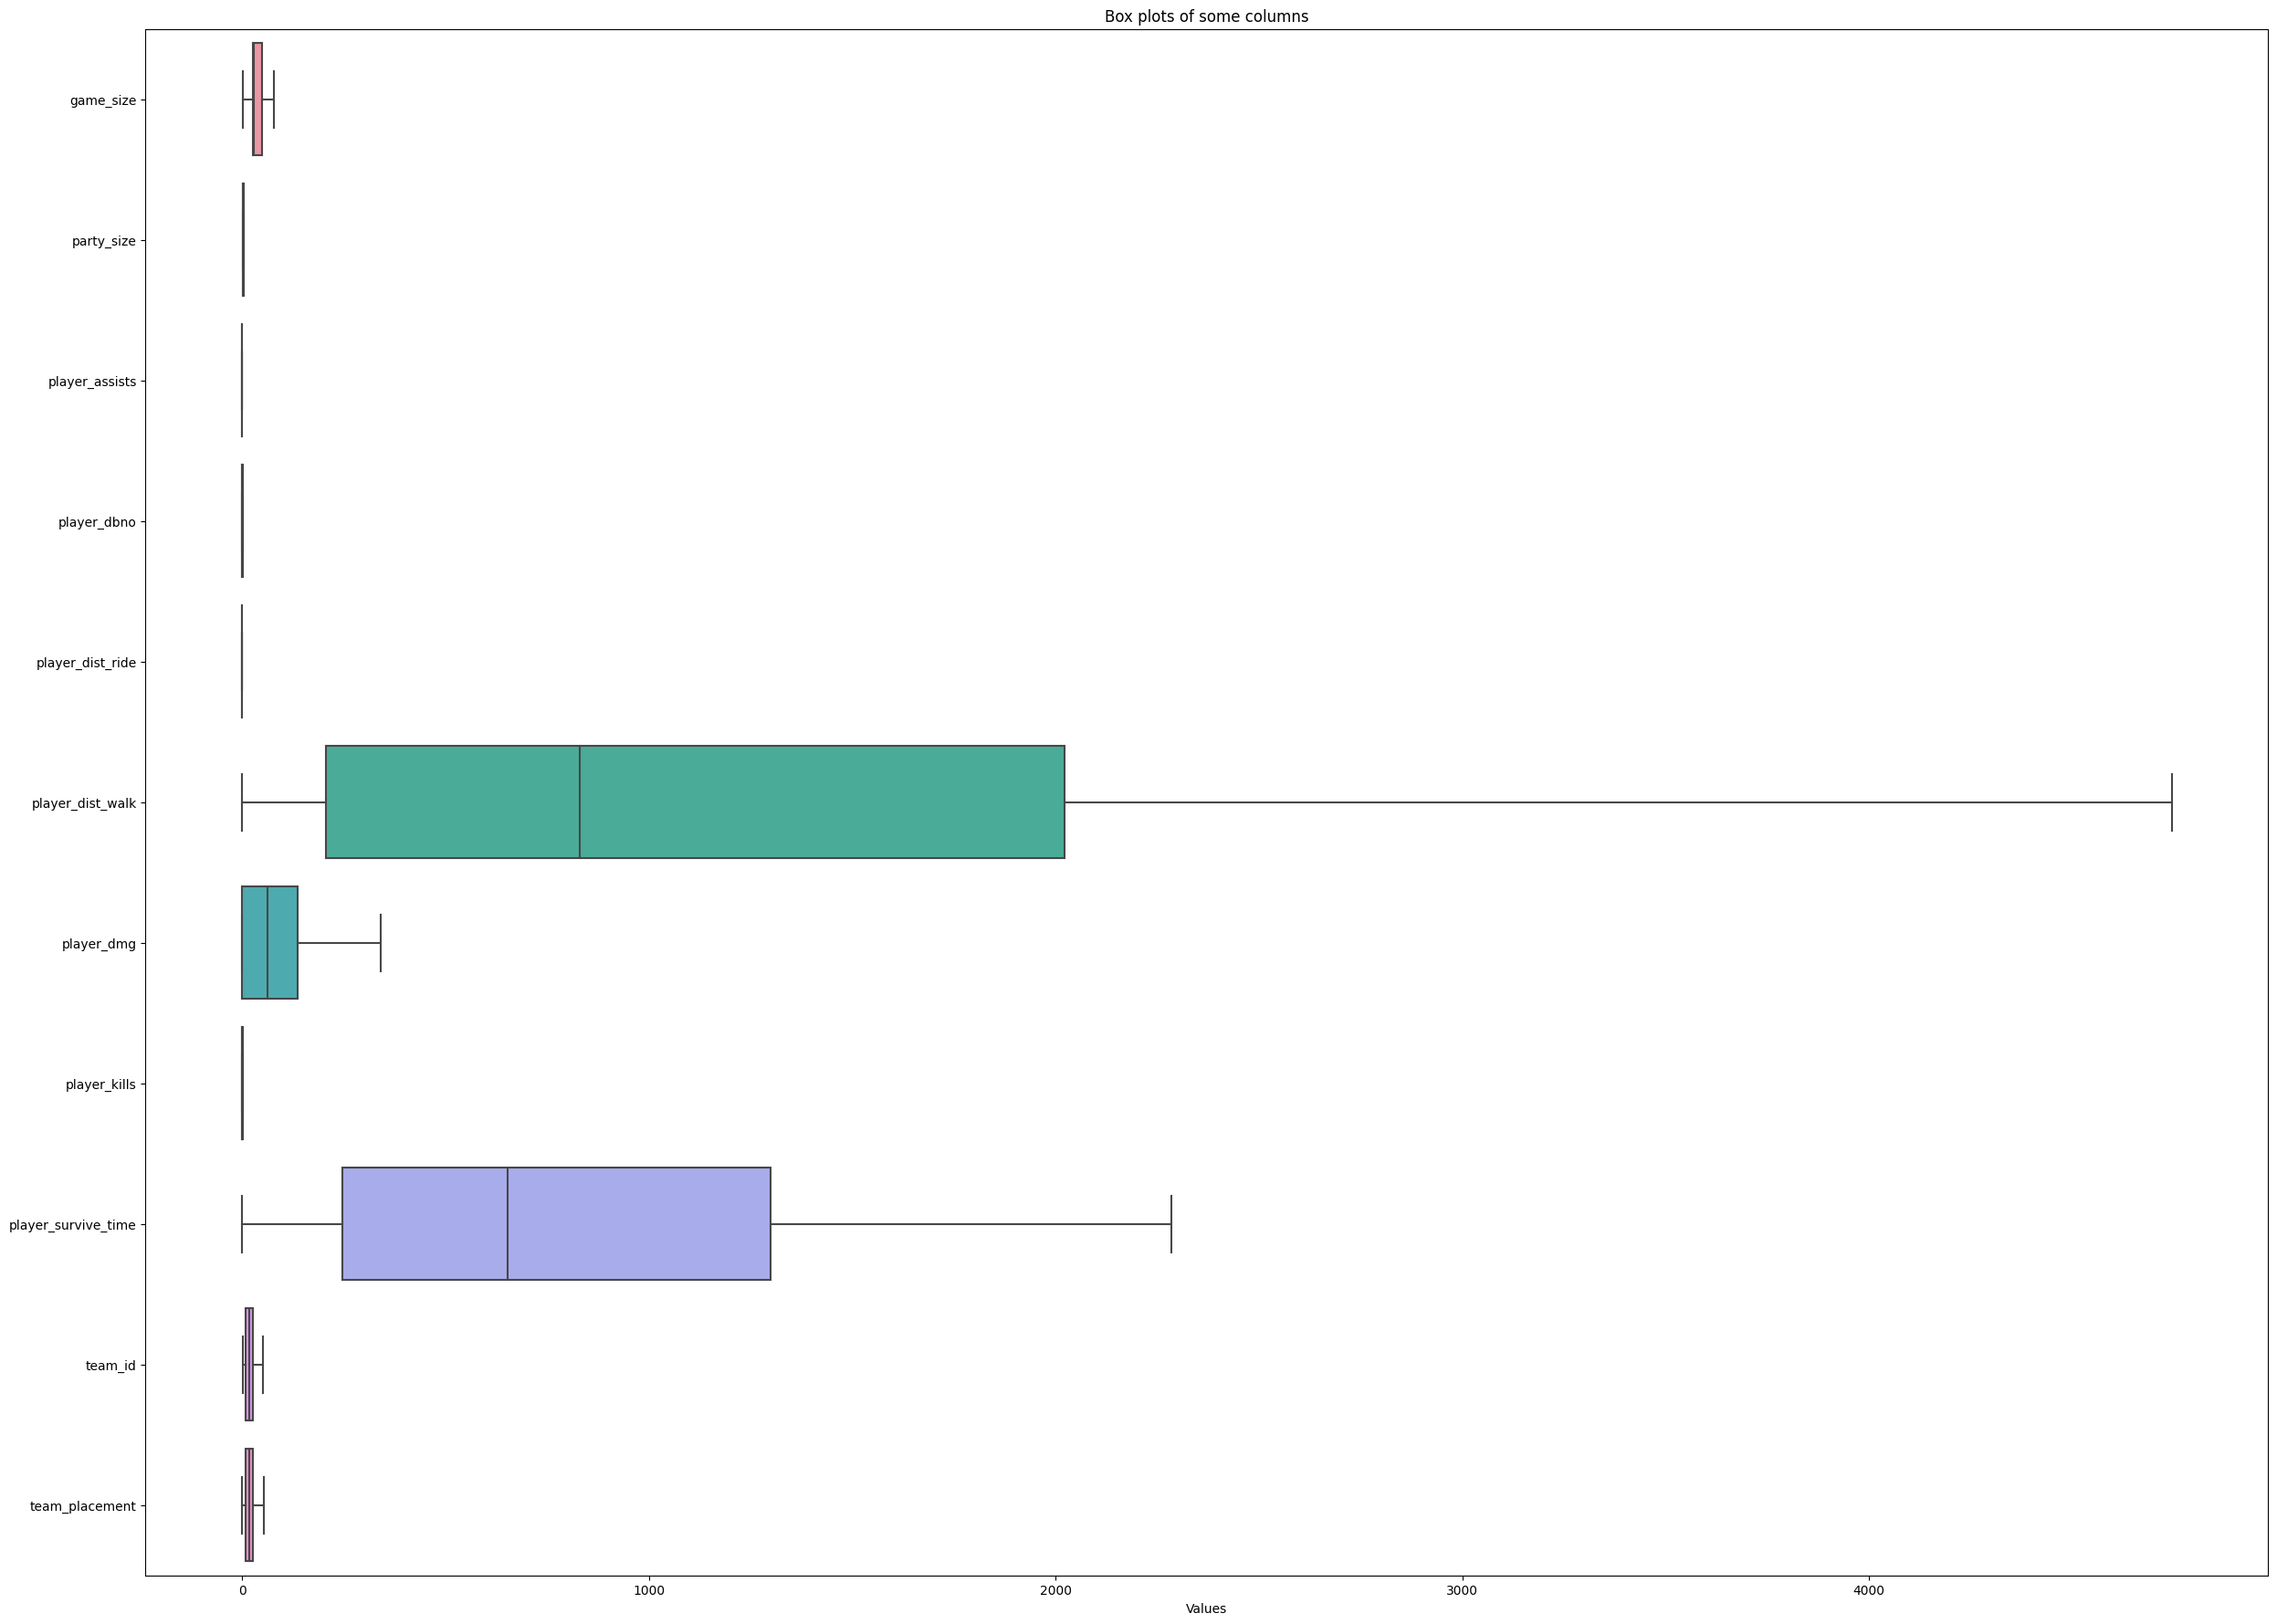

In [22]:
def remove_outlier(data,column,lower_bound=0.25,upper_quartile=0.75):
    q1=data[column].quantile(lower_bound)
    q3=data[column].quantile(upper_quartile)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    return data[(data[column]<=upper_bound) & (data[column]>=lower_bound)]
df1_columns=["game_size","party_size","player_assists","player_dbno","player_dist_ride","player_dist_walk","player_dmg","player_kills","player_survive_time","team_id","team_placement"]
for column in df1_columns:
    df1_numeric=remove_outlier(df1_numeric,df1_columns)
plt.figure(figsize=(30,22))
sns.boxplot(data=df1_numeric,orient='h')
plt.title("Box plots of some columns")
plt.xlabel("Values")

Text(0.5, 0, 'Values')

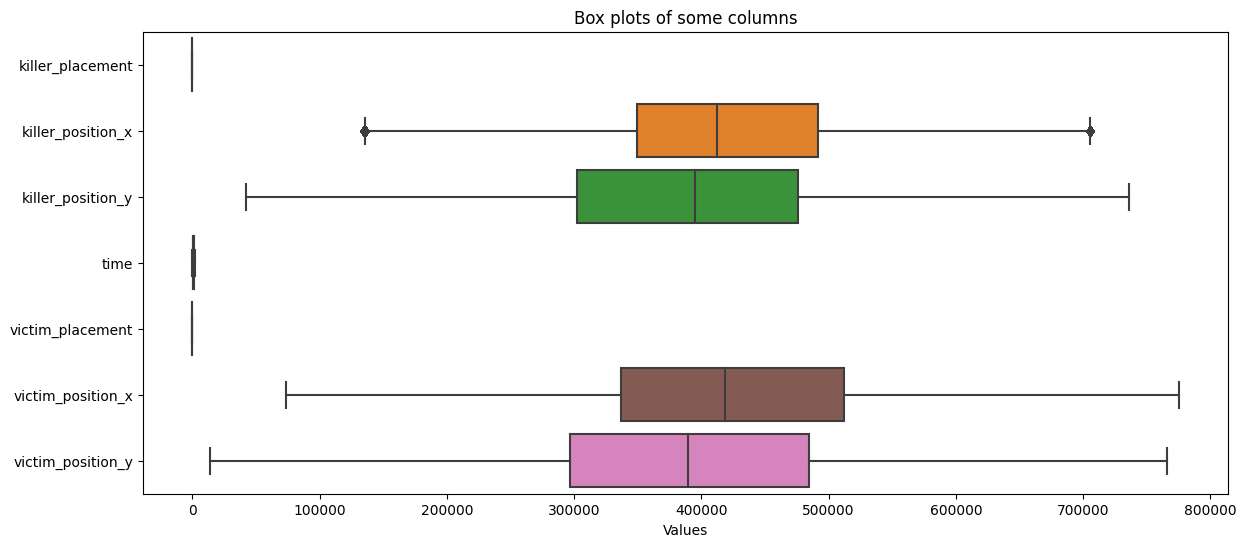

In [23]:
df2_columns=["killer_placement","killer_position_x","killer_position_y","time","victim_placement","victim_position_x","victim_position_y"]
for column in df2_columns:
    df2_numeric=remove_outlier(df2_numeric,df2_columns)
plt.figure(figsize=(14,6))
sns.boxplot(data=df2_numeric,orient='h')
plt.title("Box plots of some columns")
plt.xlabel("Values")

## > Dropping Nan values after Outlier
This code defines a dropna function to remove rows with missing values in specified columns of DataFrames df1_numeric and df2_numeric, and it does so in-place.

In [24]:
def dropna(df,feature):
    df.dropna(subset=feature,inplace=True)
    return df
for column in df1_columns:
    dropna(df1_numeric,column)
for column in df2_columns:
    dropna(df2_numeric,column)

In [25]:
print(df1_numeric.value_counts())
print(df2_numeric.value_counts())

game_size  party_size  player_assists  player_dbno  player_dist_ride  player_dist_walk  player_dmg  player_kills  player_survive_time  team_id  team_placement
1.0        2           0.0             0.0          0.0               0.000000          0.0         0.0           1.417                1.0      1.0               2
28.0       4           0.0             0.0          0.0               110.175873        53.0        0.0           172.557              13.0     25.0              2
                                                                      0.000000          0.0         0.0           168.965              13.0     28.0              2
29.0       4           0.0             1.0          0.0               347.384600        169.0       1.0           423.469              22.0     16.0              2
27.0       4           0.0             0.0          0.0               0.000000          0.0         0.0           172.099              21.0     27.0              2
                     

In [26]:
df1

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,37.919838,20,0,m3xdave,106.351,100000,88
1,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,292.205048,3457.036130,387,3,UDaddyHere,1690.021,100006,8
2,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,106.215900,0,0,Dummy05,103.415,100010,89
3,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,126.959831,91,0,NA-Wuyifan,272.838,100019,67
4,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,43.346710,0,0,kickinchicken,134.342,100024,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11993480,2017-12-17T23:55:51+0000,48,2U4GBNA0YmleHpFnzELtYdsnrlIW6s85JKQ9k61Z27ai-K...,tpp,2,1,0,0.000000,1156.541140,142,0,Kojo728,798.695,39,20
11993481,2017-12-17T23:55:51+0000,48,2U4GBNA0YmleHpFnzELtYdsnrlIW6s85JKQ9k61Z27ai-K...,tpp,2,0,0,0.000000,69.652050,0,0,Chendadaaa,102.902,40,29
11993482,2017-12-17T23:55:51+0000,48,2U4GBNA0YmleHpFnzELtYdsnrlIW6s85JKQ9k61Z27ai-K...,tpp,2,0,0,0.000000,89.552780,0,0,Feng-yuanbin,504.351,40,29
11993483,2017-12-17T23:55:51+0000,48,2U4GBNA0YmleHpFnzELtYdsnrlIW6s85JKQ9k61Z27ai-K...,tpp,2,0,0,0.000000,0.000000,0,0,ZekeTrillson,127.538,12,47


In [27]:
df1_numeric

,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,team_placement
101,28.0,4,0.0,0.0,0.0,411.564148,0.0,0.0,663.699,2.0,6.0
104,28.0,4,0.0,0.0,0.0,883.485962,124.0,1.0,714.767,4.0,16.0
105,28.0,4,0.0,1.0,0.0,294.410900,100.0,1.0,333.033,4.0,16.0
115,28.0,4,0.0,0.0,0.0,3572.747560,137.0,0.0,1503.592,8.0,5.0
117,28.0,4,0.0,1.0,0.0,72.962555,138.0,0.0,173.752,12.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
11993479,48.0,2,0.0,1.0,0.0,1059.551510,164.0,2.0,798.691,39.0,20.0
11993481,48.0,2,0.0,0.0,0.0,69.652050,0.0,0.0,102.902,40.0,29.0
11993482,48.0,2,0.0,0.0,0.0,89.552780,0.0,0.0,504.351,40.0,29.0
11993483,48.0,2,0.0,0.0,0.0,0.000000,0.0,0.0,127.538,12.0,47.0


In [35]:
df2

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,Grenade,KrazyPortuguese,5.0,657725.100000,146275.200000,1,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,KrazyPortuguese,5.0,657725.10,146275.2
1,SCAR-L,nide2Bxiaojiejie,31.0,93091.370000,722236.400000,1,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,92238.68,723375.1
2,S686,Ascholes,43.0,366921.400000,421623.900000,1,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.50,421216.1
3,Down and Out,Weirdo7777,9.0,472014.200000,313274.800000,1,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,BlackDpre,13.0,476645.90,316758.4
4,M416,Solayuki1,9.0,473357.800000,318340.500000,1,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,Vjolt,13.0,473588.50,318418.8
...,...,...,...,...,...,...,...,...,...,...,...,...
13426343,Bluezone,NaN,10.0,412177.468611,395182.889834,0,2U4GBNA0YmkTZQvSzreuDJjVgxqK1nIRqCKc5yGZ5INIVZ...,1519,Carmen_Amy,28.0,165267.30,601221.8
13426344,Down and Out,Subastral,9.0,298162.800000,501961.700000,0,2U4GBNA0YmkTZQvSzreuDJjVgxqK1nIRqCKc5yGZ5INIVZ...,1086,JimmyChiu_,28.0,299201.80,504790.9
13426345,SCAR-L,TingFg,20.0,447251.200000,628701.700000,0,2U4GBNA0YmkTZQvSzreuDJjVgxqK1nIRqCKc5yGZ5INIVZ...,327,LYB_LaoJ,19.0,447025.30,628270.8
13426346,SCAR-L,OldBlack6,3.0,152108.800000,315162.600000,0,2U4GBNA0YmkTZQvSzreuDJjVgxqK1nIRqCKc5yGZ5INIVZ...,624,jaydenhuang07,11.0,152887.40,315209.8


In [28]:
df2_numeric

,killer_placement,killer_position_x,killer_position_y,time,victim_placement,victim_position_x,victim_position_y
0,5.0,657725.100000,146275.200000,823,5.0,657725.1,146275.2
3,9.0,472014.200000,313274.800000,1018,13.0,476645.9,316758.4
4,9.0,473357.800000,318340.500000,1018,13.0,473588.5,318418.8
6,12.0,376333.800000,317858.900000,886,15.0,372808.3,297124.2
7,27.0,373125.300000,433540.600000,137,38.0,373125.8,433608.8
...,...,...,...,...,...,...,...
13426343,10.0,412177.468611,395182.889834,1519,28.0,165267.3,601221.8
13426344,9.0,298162.800000,501961.700000,1086,28.0,299201.8,504790.9
13426345,20.0,447251.200000,628701.700000,327,19.0,447025.3,628270.8
13426346,3.0,152108.800000,315162.600000,624,11.0,152887.4,315209.8


In [29]:
'''counts the number of NaN (missing) values in the "killer_placement" column of two DataFrames, df2_numeric and df2. The first line counts NaN 
values in df2_numeric, while the second line counts NaN values in the original DataFrame df2.'''
print(np.isnan(df2_numeric["killer_placement"]).value_counts())
print(np.isnan(df2["killer_placement"]).value_counts())

killer_placement
False    11018780
Name: count, dtype: int64
killer_placement
False    13426348
Name: count, dtype: int64


In [30]:
df1["player_dbno"].unique()

array([ 0,  1,  3,  5,  4,  2,  6,  9,  7, 15, 10, 12,  8, 18, 13, 11, 19,
       16, 14, 17, 22, 26, 39, 25, 20, 21, 31, 32, 36, 23, 38, 27, 28, 40,
       41, 35, 29, 24, 30, 34, 37, 33, 48])

## > FEATURE ENGINEERING AND ENCODING
1. Converting the datatype of columns for the above Data of Aggregate and kill will help in Machine Learning Models for further Analysis and better evaluation of the game.

2. Using Feature Extraction to ungroup the important data from the Feature.

3. Using Encoding methods on the Categorical data to be used for prediction. The Machine Learning Models allows the data to be standardized so the Model perfoamnce is imrpoved by Scled data which has zero mean and unit variance.

4. Feature Selection helps in selecting the Features  and using those Features we can extract insights which can be used for further Analysis or Machine Learning Models.

In [31]:
df1["date"]=pd.to_datetime(df1["date"])

In [32]:
# Using one hot encoding for Map to convert to numerical
df2["map"].replace(["ERANGEL","MIRAMAR"],[0,1],inplace=True)
# Using Feature Engineering to Normalise the data
df2_numeric["killer_placement"]=df2_numeric["killer_placement"].astype(int)
df2_numeric["victim_placement"]=df2_numeric["victim_placement"].astype(int)
df1["match_mode"].replace("tpp",0,inplace=True)
# Using Feature Exctraction for ungrouping data and creating new Features
df1["year"]=df1["date"].dt.year
df1["month"]=df1["date"].dt.month
df1["Date"]=df1["date"].dt.date
df1_numeric["game_size"]=df1_numeric["game_size"].astype(int)
df1_numeric["player_assists"]=df1_numeric["player_assists"].astype(int)
df1_numeric["player_dbno"]=df1_numeric["player_dbno"].astype(int)
df1_numeric["player_dmg"]=df1_numeric["player_dmg"].astype(int)
df1_numeric["team_id"]=df1_numeric["team_id"].astype(int)

In [33]:
df1["player_kills"].unique()

array([ 0,  3,  2,  1,  5,  9,  4,  7, 10,  8,  6, 18, 15, 12, 13, 30, 14,
       11, 16, 19, 17, 24, 20, 22, 25, 38, 32, 23, 46, 29, 21, 33, 45, 51,
       28, 27, 31, 26, 42, 35, 36, 41, 37, 39, 52, 47, 44, 58, 54, 34, 40,
       48, 57, 43, 49, 53, 55, 50, 68, 62, 61, 64])

## > GAME TIME ANALYSIS AND VISUALIZATIONS


In [2]:
import random
import pandas as pd

# Set the seed for reproducibility
random.seed(100615)

# Read data1 and create a backup
data1 = pd.read_csv("C:/Users/Prathamesh/Documents/M.Sc Data Science/pubg/aggregate/agg_match_stats_1.csv")
data1_backup = data1.copy()

# Sample 100,000 rows without replacement
data1 = data1.sample(n=100000, replace=False)

# Read data2 and create a backup
data2 = pd.read_csv("C:/Users/Prathamesh/Documents/M.Sc Data Science/pubg/deaths/kill_match_stats_final_1.csv")
data2_backup = data2.copy()

# Sample 100,000 rows without replacement
data2 = data2.sample(n=100000, replace=False)

In [3]:
# Remove rows with missing values (NA)
data1.dropna(inplace=True)
data2.dropna(inplace=True)

# Filter rows where 'map' column is not empty
data2 = data2[data2['map'].notna()]

# Remove the 4th column from data1
data1.drop(data1.columns[3], axis=1, inplace=True)

# Create a DataFrame to count occurrences of 'match_id' in data1
match_id = pd.DataFrame(data1['match_id'].value_counts().reset_index())
match_id.columns = ['Var1', 'Count']

# Create a DataFrame to count occurrences of 'player_name' in data1
id1 = pd.DataFrame(data1['player_name'].value_counts().reset_index())
id1.columns = ['Var1', 'Count']

# Create a DataFrame to count occurrences of 'match_id' in data2
match_id2 = pd.DataFrame(data2['match_id'].value_counts().reset_index())
match_id2.columns = ['Var1', 'Count']

# Create a DataFrame to count occurrences of 'victim_name' in data2
id_victim = pd.DataFrame(data2['victim_name'].value_counts().reset_index())
id_victim.columns = ['Var1', 'Count']

# Calculate the lengths
len_match_id = len(match_id)
len_id1 = len(id1)
len_match_id2 = len(match_id2)
len_id_victim = len(id_victim)

print(len_match_id)
print(len_id1)
print(len_match_id2)
print(len_id_victim)


73043
96656
67442
87183


In [4]:
data1

,date,game_size,match_id,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
10063675,2017-11-09T05:05:02+0000,99,2U4GBNA0Ymm8mDcTHEbdR1cnymH98WwV8WfTddFWQeQmd-...,1,0,0,3952.84961,573.330444,91,0,probably-allison,844.971,100041,40
8641193,2017-11-15T09:19:55+0000,46,2U4GBNA0YmlvcuGZVESVuIMZbKml3rOsSkDTqMmCbrUiCh...,2,0,0,2927.85800,343.952545,0,0,NemeTan,370.409,9,31
3599230,2017-11-04T13:38:42+0000,28,2U4GBNA0YmmCPSyyI_nm09hOEtZvdWHxQmKqsiHQ7fGuOO...,4,0,0,825.52340,1205.037350,0,0,PanYouYou,507.569,8,23
5030913,2017-12-09T11:10:20+0000,98,2U4GBNA0Ymnc3SxUKUa9v58mpPdXPLZxsfHuAAjKQpEwe9...,1,0,0,0.00000,299.471222,24,0,gaoxiang9527,261.254,100056,75
10097404,2017-12-01T12:48:15+0000,27,2U4GBNA0YmnEp4wA6nBdWnzBWS943yq9n6-ux18GLxPrzj...,4,0,2,0.00000,1759.535160,475,4,iphone__9S,682.799,26,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13379466,2017-12-14T02:49:09+0000,28,2U4GBNA0YmlEHvwvrr-sqFXKN-T7zEDv7o2X7c1i2NsZZ-...,4,0,2,0.00000,4171.095000,35,0,Datcoolcow,1374.855,3,13
1774062,2017-12-23T02:36:46+0000,47,2U4GBNA0YmmitRB-nVfGq8aIHlvJL05bZnx1e7IU23C1Bs...,2,1,0,1891.66760,2767.428220,104,1,tomliang,1643.255,34,7
11883389,2017-11-24T19:23:40+0000,23,2U4GBNA0YmkQDxedDQ40Juyl4rUvgJ7Nszhc5-P93oQHvh...,4,0,0,0.00000,472.176880,28,0,wh-hhh,437.506,6,17
11883427,2017-11-24T19:23:40+0000,23,2U4GBNA0YmkQDxedDQ40Juyl4rUvgJ7Nszhc5-P93oQHvh...,4,0,1,2254.85522,1371.495360,109,0,themightychooch,885.285,22,12


In [5]:
# Extract day and time columns from the 'date' column in data1
data1['day'] = data1['date'].str[:10]
data1['time'] = data1['date'].str[11:19]

# Remove the original 'date' column from data1
data1 = data1.drop(columns=['date'])

miramar = data2[data2['map'] == 'MIRAMAR']
erangel = data2[data2['map'] == 'ERANGEL']

lastkill = data2[(data2['killer_placement'] == 1) & (data2['victim_placement'] == 2)]

data1['day'] = pd.to_datetime(data1['day'])
day = pd.DataFrame(data1['day'].value_counts()).reset_index()
day.columns = ['day', 'count']


In [6]:
data1

,game_size,match_id,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement,day,time
10063675,99,2U4GBNA0Ymm8mDcTHEbdR1cnymH98WwV8WfTddFWQeQmd-...,1,0,0,3952.84961,573.330444,91,0,probably-allison,844.971,100041,40,2017-11-09,05:05:02
8641193,46,2U4GBNA0YmlvcuGZVESVuIMZbKml3rOsSkDTqMmCbrUiCh...,2,0,0,2927.85800,343.952545,0,0,NemeTan,370.409,9,31,2017-11-15,09:19:55
3599230,28,2U4GBNA0YmmCPSyyI_nm09hOEtZvdWHxQmKqsiHQ7fGuOO...,4,0,0,825.52340,1205.037350,0,0,PanYouYou,507.569,8,23,2017-11-04,13:38:42
5030913,98,2U4GBNA0Ymnc3SxUKUa9v58mpPdXPLZxsfHuAAjKQpEwe9...,1,0,0,0.00000,299.471222,24,0,gaoxiang9527,261.254,100056,75,2017-12-09,11:10:20
10097404,27,2U4GBNA0YmnEp4wA6nBdWnzBWS943yq9n6-ux18GLxPrzj...,4,0,2,0.00000,1759.535160,475,4,iphone__9S,682.799,26,20,2017-12-01,12:48:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13379466,28,2U4GBNA0YmlEHvwvrr-sqFXKN-T7zEDv7o2X7c1i2NsZZ-...,4,0,2,0.00000,4171.095000,35,0,Datcoolcow,1374.855,3,13,2017-12-14,02:49:09
1774062,47,2U4GBNA0YmmitRB-nVfGq8aIHlvJL05bZnx1e7IU23C1Bs...,2,1,0,1891.66760,2767.428220,104,1,tomliang,1643.255,34,7,2017-12-23,02:36:46
11883389,23,2U4GBNA0YmkQDxedDQ40Juyl4rUvgJ7Nszhc5-P93oQHvh...,4,0,0,0.00000,472.176880,28,0,wh-hhh,437.506,6,17,2017-11-24,19:23:40
11883427,23,2U4GBNA0YmkQDxedDQ40Juyl4rUvgJ7Nszhc5-P93oQHvh...,4,0,1,2254.85522,1371.495360,109,0,themightychooch,885.285,22,12,2017-11-24,19:23:40


In [7]:
day

,day,count
0,2017-12-27,1927
1,2017-12-26,1854
2,2017-12-30,1815
3,2017-12-29,1802
4,2017-12-25,1737
...,...,...
78,2017-11-30,825
79,2017-12-14,738
80,2018-01-10,604
81,2017-10-20,519


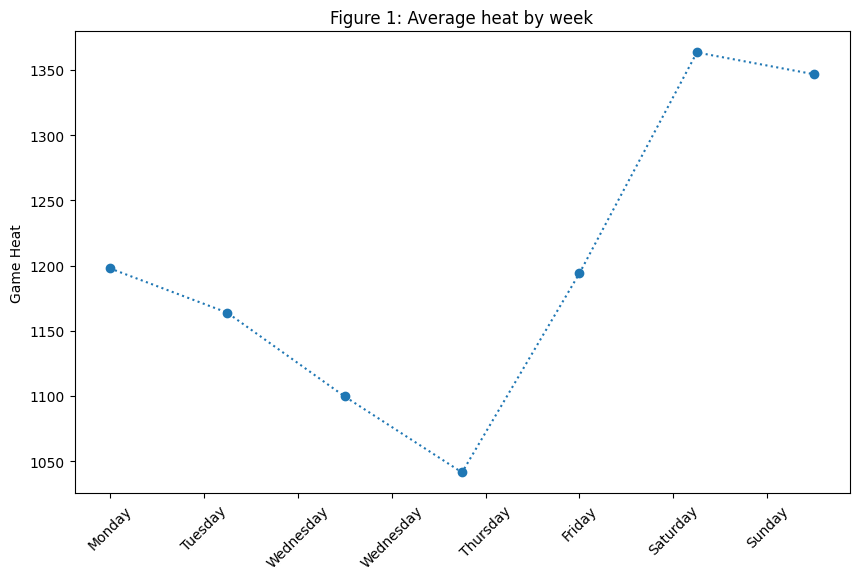

In [9]:
import matplotlib.pyplot as plt

# Calculate the weekday and create 'week' DataFrame
day['weekday'] = day['day'].dt.strftime('%A')
week = day['weekday'].value_counts().reset_index()
week.columns = ['weekday', 'freq']

# Calculate the sum of 'Freq' by weekday
sum_by_weekday = day.groupby('weekday')['count'].sum().reset_index()
sum_by_weekday.columns = ['weekday', 'Freq']

# Merge 'sum_by_weekday' and 'week' DataFrames
week = pd.merge(sum_by_weekday, week, on='weekday')

# Calculate the average 'Game Heat'
week['aver'] = week['Freq'] / week['freq']

# Define the order of weekdays
week['weekday'] = pd.Categorical(week['weekday'], ordered=True, categories=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# Sort the DataFrame by weekday
week = week.sort_values(by='weekday').reset_index(drop=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(week['weekday'], week['aver'], linestyle='dotted', marker='o')
plt.title('Figure 1: Average heat by week')
plt.xlabel('')
plt.ylabel('Game Heat')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='both'))
plt.show()


C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_30520\2092925683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logintime['weekday'] = logintime['day'].dt.strftime('%A')
C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_30520\2092925683.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logintime['time'] = logintime['time'].apply(timeHM_formatter)
C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_30520\2092925683.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

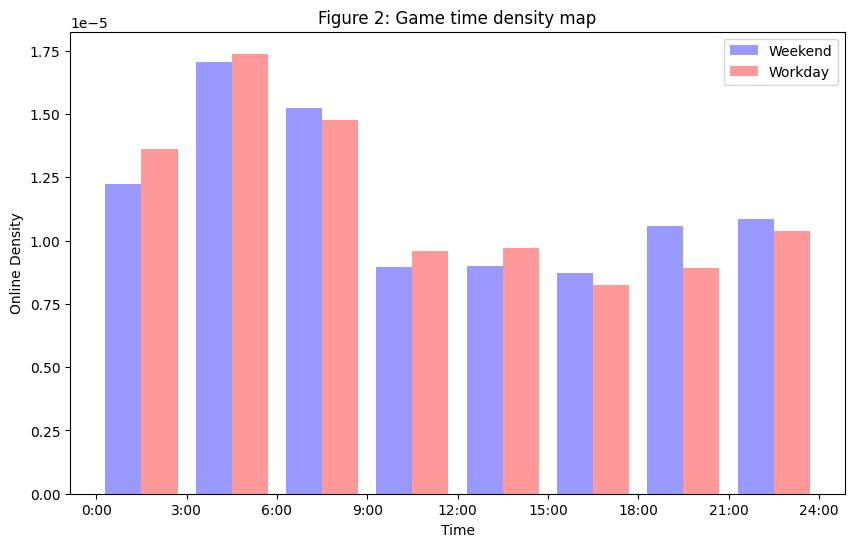

In [11]:
# Extract 'day' and 'time' columns from 'data1'
logintime = data1[['day', 'time']]

# Calculate the weekday
logintime['weekday'] = logintime['day'].dt.strftime('%A')

# Define a function to convert time to seconds
def timeHM_formatter(x):
    h = int(x[:2])
    m = int(x[3:5])
    s = int(x[6:8])
    return 3600 * h + 60 * m + s

# Apply the timeHM_formatter function to 'time' column
logintime['time'] = logintime['time'].apply(timeHM_formatter)

# Define 'week' column based on weekdays
logintime['week'] = logintime['weekday'].apply(lambda x: 'Weekend' if x in ["Saturday", "Sunday"] else 'Workday')

# Plot the data
plt.figure(figsize=(10, 6))
plt.hist([logintime[logintime['week'] == 'Weekend']['time'], logintime[logintime['week'] == 'Workday']['time']],
         bins=8, alpha=0.4, color=['blue', 'red'], label=['Weekend', 'Workday'], density=True)
plt.xlabel('Time')
plt.ylabel('Online Density')
plt.title('Figure 2: Game time density map')
plt.legend()
plt.xticks([10800 * i for i in range(9)], ["0:00", "3:00", "6:00", "9:00", "12:00", "15:00", "18:00", "21:00", "24:00"])
plt.show()


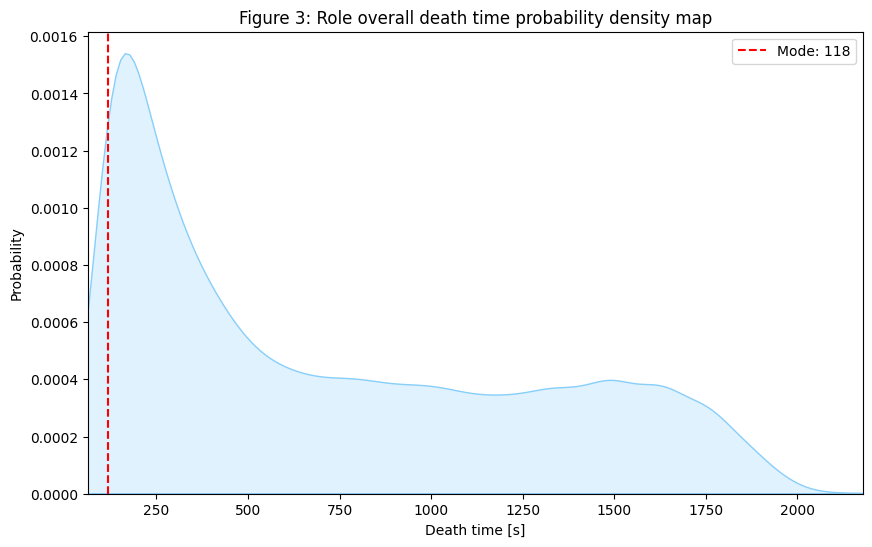

In [13]:
import seaborn as sns

# Define the zhongshu function
def zhongshu(x):
    return pd.to_numeric(x.value_counts().idxmax())

# Convert 'time' column to numeric
data2['time'] = pd.to_numeric(data2['time'])

# Get the range of 'time' column
time_range = data2['time'].min(), data2['time'].max()

# Calculate the mode of 'time' column using zhongshu function
mode_time = zhongshu(data2['time'])

# Create a density heatmap
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data2, x='time', fill=True, color='#87CEFA')
plt.xlabel('Death time [s]')
plt.ylabel('Probability')
plt.title('Figure 3: Role overall death time probability density map')
plt.axvline(mode_time, color='red', linestyle='--', label=f'Mode: {mode_time}')
plt.legend()
plt.xlim(time_range)
plt.show()


C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_30520\3208420326.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erangel['time'] = pd.to_numeric(erangel['time'])
C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_30520\3208420326.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miramar['time'] = pd.to_numeric(miramar['time'])


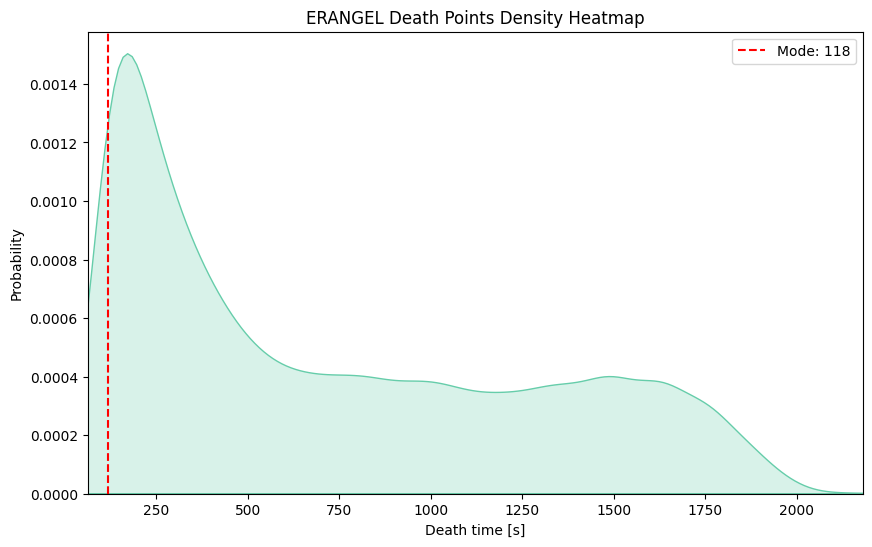

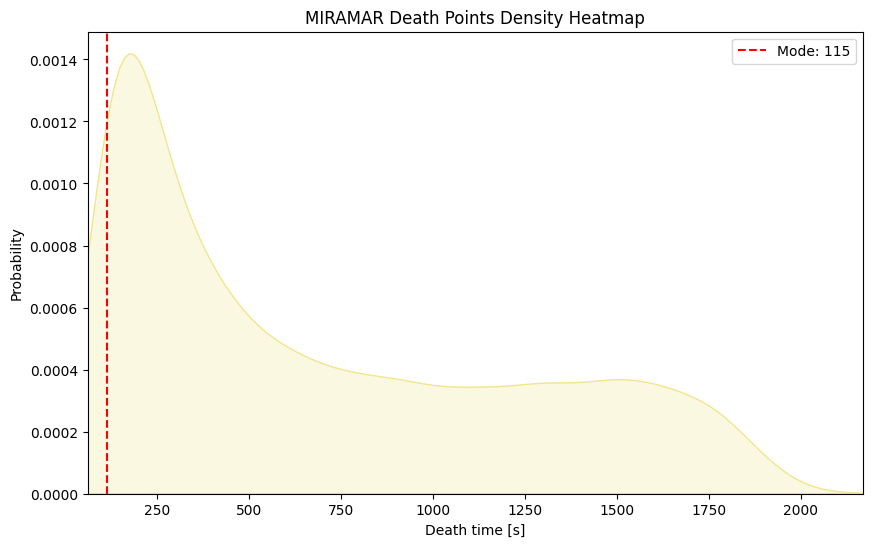

In [14]:
# Define the zhongshu function
def zhongshu(x):
    return pd.to_numeric(x.value_counts().idxmax())

# Convert 'time' column to numeric for ERANGEL and MIRAMAR DataFrames
erangel['time'] = pd.to_numeric(erangel['time'])
miramar['time'] = pd.to_numeric(miramar['time'])

# Get the range and mode of 'time' column for ERANGEL
erangel_time_range = erangel['time'].min(), erangel['time'].max()
erangel_mode_time = zhongshu(erangel['time'])

# Get the range and mode of 'time' column for MIRAMAR
miramar_time_range = miramar['time'].min(), miramar['time'].max()
miramar_mode_time = zhongshu(miramar['time'])

# Create a density heatmap for ERANGEL
plt.figure(figsize=(10, 6))
sns.kdeplot(data=erangel, x='time', fill=True, color='#66CDAA')
plt.xlabel('Death time [s]')
plt.ylabel('Probability')
plt.title('ERANGEL Death Points Density Heatmap')
plt.axvline(erangel_mode_time, color='red', linestyle='--', label=f'Mode: {erangel_mode_time}')
plt.legend()
plt.xlim(erangel_time_range)
plt.show()

# Create a density heatmap for MIRAMAR
plt.figure(figsize=(10, 6))
sns.kdeplot(data=miramar, x='time', fill=True, color='#F0E68C')
plt.xlabel('Death time [s]')
plt.ylabel('Probability')
plt.title('MIRAMAR Death Points Density Heatmap')
plt.axvline(miramar_mode_time, color='red', linestyle='--', label=f'Mode: {miramar_mode_time}')
plt.legend()
plt.xlim(miramar_time_range)
plt.show()


**Skydiving position preference**

C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_30520\543768465.py:33: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=df, x='killer_position_x', y='killer_position_y', cmap='RdYlGn', shade=True, cbar=True, levels=bins, shade_lowest=False)
C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_30520\543768465.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='killer_position_x', y='killer_position_y', cmap='RdYlGn', shade=True, cbar=True, levels=bins, shade_lowest=False)


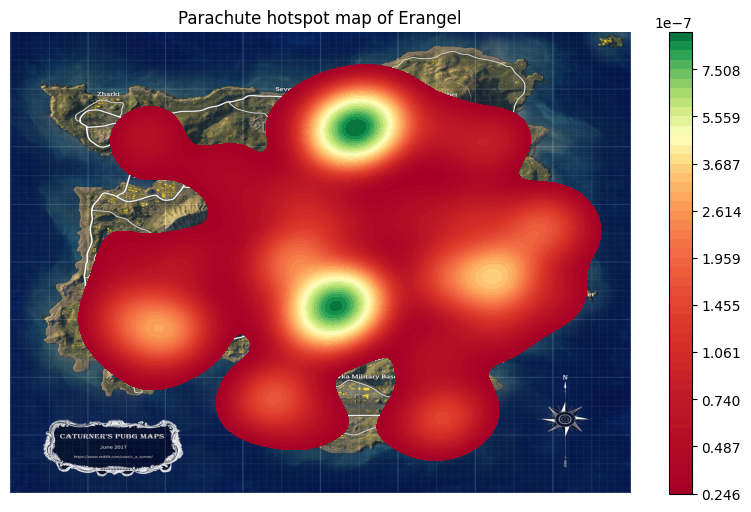

C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_30520\543768465.py:33: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=df, x='killer_position_x', y='killer_position_y', cmap='RdYlGn', shade=True, cbar=True, levels=bins, shade_lowest=False)
C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_30520\543768465.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='killer_position_x', y='killer_position_y', cmap='RdYlGn', shade=True, cbar=True, levels=bins, shade_lowest=False)


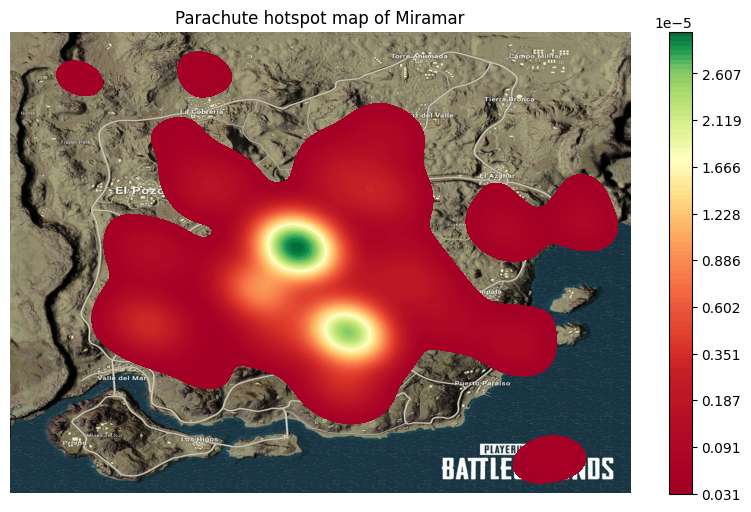

In [15]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Filter 'erangel' and 'miramar' DataFrames for times within 61-121s and 62-122s, respectively
era_landing = erangel[(erangel['time'] >= 61) & (erangel['time'] <= 121)].copy()
mir_landing = miramar[(miramar['time'] >= 62) & (miramar['time'] <= 122)].copy()

# Scale columns 4, 5, 11, and 12 for 'era_landing' and 'mir_landing'
scaling_factor_erangel = 4096 / 800000
scaling_factor_miramar = 1000 / 800000

era_landing.iloc[:, [3, 4, 10, 11]] *= scaling_factor_erangel
mir_landing.iloc[:, [3, 4, 10, 11]] *= scaling_factor_miramar

# Load map images
erangel_map = plt.imread("C:/Users/Prathamesh/Documents/M.Sc Data Science/pubg/erangel.jpg")
miramar_map = plt.imread("C:/Users/Prathamesh/Documents/M.Sc Data Science/pubg/miramar.jpg")

# Get dimensions of 'era_landing' and 'mir_landing' DataFrames
era_landing_dimensions = era_landing.shape[0]
mir_landing_dimensions = mir_landing.shape[0]

# Define a function to plot the heatmap with a map background
def plot_heatmap_with_map(df, map_image, title, xlim, ylim, bins, map_width, map_height):
    plt.figure(figsize=(10, 6))
    
    # Plot the map background
    plt.imshow(map_image, extent=[0, map_width, 0, map_height], aspect='auto')
    
    # Scatter plot of killer positions
    plt.scatter(df['killer_position_x'], df['killer_position_y'], c='lightgreen', s=0.1, edgecolors='none', alpha=0.5)
    
    # Create a 2D density plot with lighter density
    sns.kdeplot(data=df, x='killer_position_x', y='killer_position_y', cmap='RdYlGn', shade=True, cbar=True, levels=bins, shade_lowest=False)
    
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.axis('off')
    
    plt.show()

# Plot the heatmap for Erangel
plot_heatmap_with_map(era_landing, erangel_map, "Parachute hotspot map of Erangel", [0, 4096], [4096, 0], 50, 4096, 4096)

# Plot the heatmap for Miramar
plot_heatmap_with_map(mir_landing, miramar_map, "Parachute hotspot map of Miramar", [0, 1000], [1000, 0], 100, 1000, 1000)


**Player mode preference**

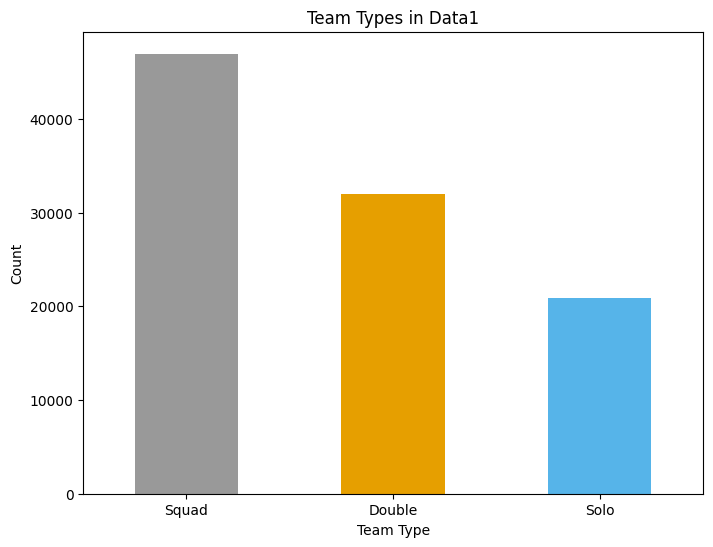

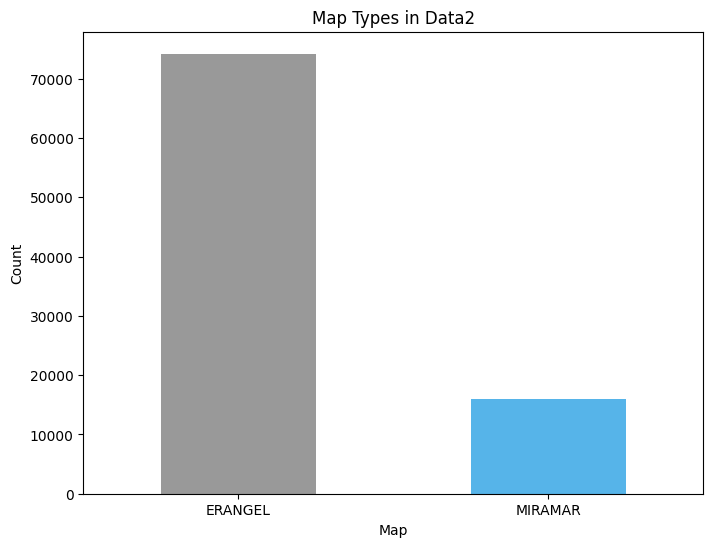

In [16]:
# Create a new column 'team' based on 'party_size'
data1['team'] = data1['party_size'].apply(lambda x: 'Solo' if x == 1 else 'Double' if x == 2 else 'Squad')

# Plot the bar chart for 'data1'
plt.figure(figsize=(8, 6))
data1['team'].value_counts().plot(kind='bar', color=['#999999', '#E69F00', '#56B4E9'])
plt.xlabel('Team Type')
plt.ylabel('Count')
plt.title('Team Types in Data1')
plt.xticks(rotation=0)
plt.text(0, max(data1['team'].value_counts()) + 20, data1['team'].value_counts()['Solo'], ha='center', va='bottom', color='white', fontsize=12)
plt.text(1, max(data1['team'].value_counts()) + 20, data1['team'].value_counts()['Double'], ha='center', va='bottom', color='white', fontsize=12)
plt.text(2, max(data1['team'].value_counts()) + 20, data1['team'].value_counts()['Squad'], ha='center', va='bottom', color='white', fontsize=12)
plt.show()

# Plot the bar chart for 'data2'
plt.figure(figsize=(8, 6))
data2['map'].value_counts().plot(kind='bar', color=['#999999', '#56B4E9'])
plt.xlabel('Map')
plt.ylabel('Count')
plt.title('Map Types in Data2')
plt.xticks(rotation=0)
plt.text(0, max(data2['map'].value_counts()) + 20, data2['map'].value_counts()['ERANGEL'], ha='center', va='bottom', color='white', fontsize=12)
plt.text(1, max(data2['map'].value_counts()) + 20, data2['map'].value_counts()['MIRAMAR'], ha='center', va='bottom', color='white', fontsize=12)
plt.show()


**Firearms analysis**

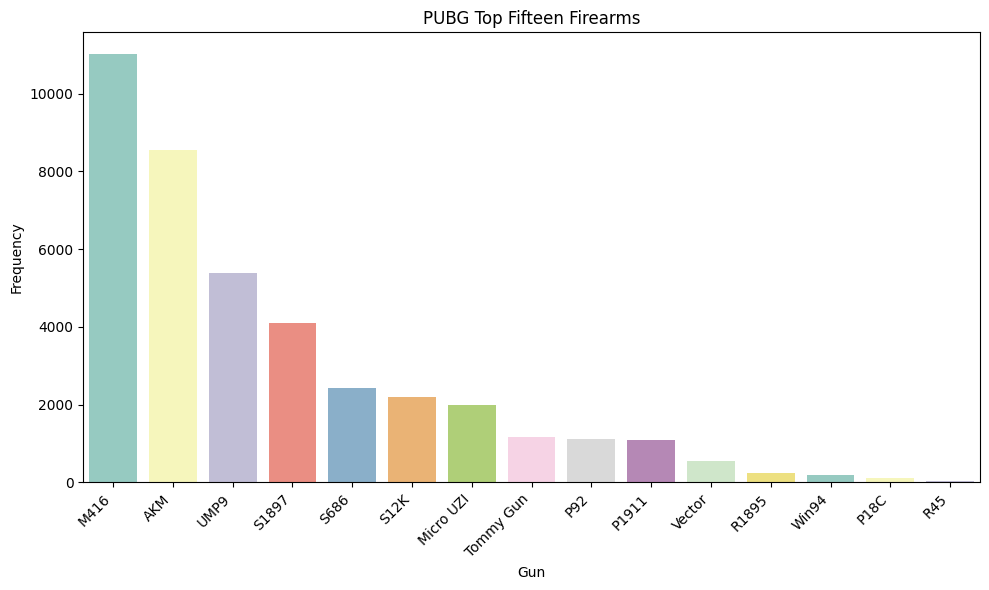

In [17]:
# Create a DataFrame to count the occurrences of each weapon
weapon_counts = data2['killed_by'].value_counts().reset_index()
weapon_counts.columns = ['gun', 'Freq']

# Filter for the top fifteen firearms
top_fifteen_guns = weapon_counts.loc[weapon_counts['gun'].isin(['P18C', 'P1911', 'P92', 'R1895', 'R45', 'Win94', 'S1897', 'S686', 'S12K', 'UMP9', 'Micro UZI', 'Vector', 'Tommy Gun', 'AKM', 'M416'])]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='gun', y='Freq', data=top_fifteen_guns, palette='Set3')
plt.xlabel('Gun')
plt.ylabel('Frequency')
plt.title('PUBG Top Fifteen Firearms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Kill distance**

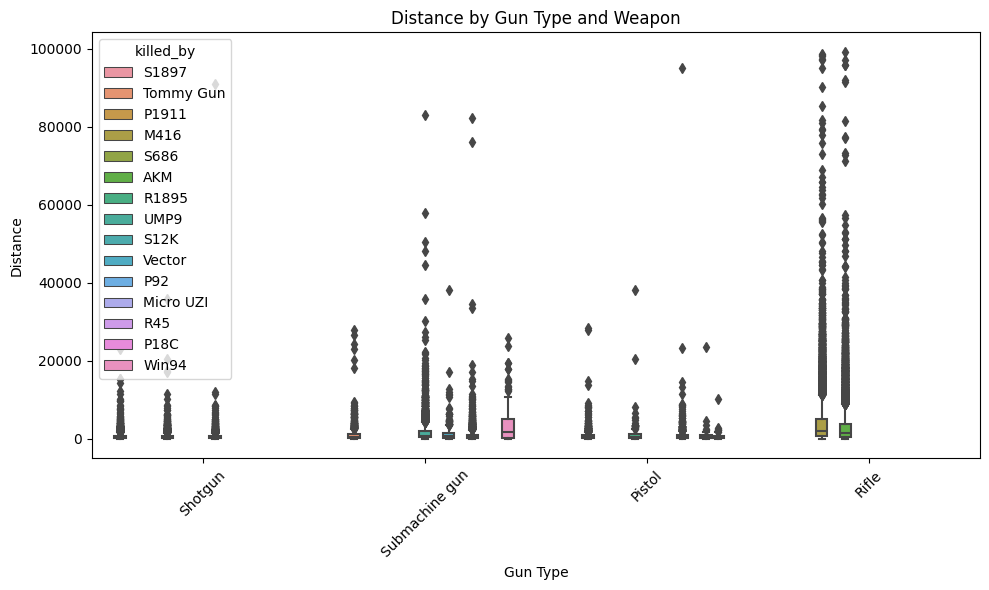

In [18]:
# Filter out rows where victim and killer positions are not zero
data3 = data2[(data2['victim_position_x'] != 0) & (data2['victim_position_y'] != 0) & (data2['killer_position_x'] != 0) & (data2['killer_position_y'] != 0)].copy()

# Calculate the distance
data3['distance'] = ((data3['killer_position_x'] - data3['victim_position_x']) ** 2 + (data3['killer_position_y'] - data3['victim_position_y']) ** 2) ** 0.5

# Subset data for the top fifteen guns
data4 = data3[data3['killed_by'].isin(top_fifteen_guns['gun'])].copy()

# Create a new column 'guntype' based on 'killed_by'
data4.loc[data4['killed_by'].isin(['AKM', 'M416', 'SCAR-L', 'M16A4']), 'guntype'] = 'Rifle'
data4.loc[data4['killed_by'].isin(['P18C', 'P1911', 'P92', 'R1895', 'R45']), 'guntype'] = 'Pistol'
data4.loc[data4['killed_by'].isin(['S1897', 'S686', 'S12K']), 'guntype'] = 'Shotgun'
data4.loc[data4['killed_by'].isin(['Kar98k', 'M24', 'AWM']), 'guntype'] = 'Sniper rifle1'
data4.loc[data4['killed_by'].isin(['Mini 14', 'SKS']), 'guntype'] = 'Sniper rifle2'
data4['guntype'].fillna('Submachine gun', inplace=True)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='guntype', y='distance', hue='killed_by', data=data4)
plt.xlabel('Gun Type')
plt.ylabel('Distance')
plt.title('Distance by Gun Type and Weapon')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Team size factor**

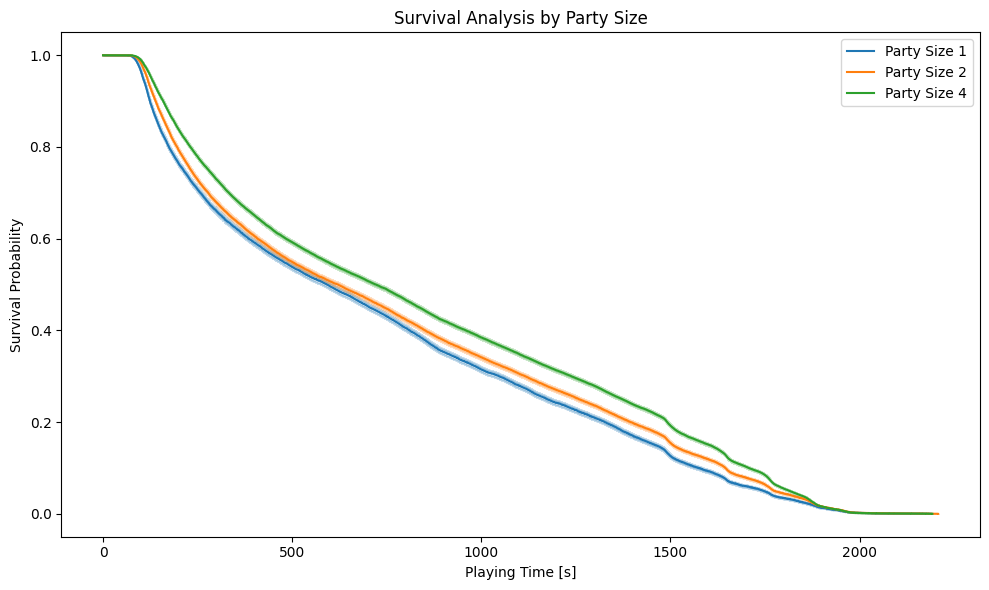

In [19]:
from lifelines import KaplanMeierFitter

# Get unique party sizes
party_sizes = data1['party_size'].unique()

# Create a Kaplan-Meier estimator for each party size and plot them together
plt.figure(figsize=(10, 6))
for party_size in party_sizes:
    subset_data = data1[data1['party_size'] == party_size]
    durations = subset_data['player_survive_time']
    event_observed = subset_data['party_size'].apply(lambda x: 1 if x == party_size else 0)  # Create binary event_observed for the specific party size
    kmf = KaplanMeierFitter()
    kmf.fit(durations, event_observed=event_observed)
    kmf.plot(label=f'Party Size {party_size}')

# Customize the plot
plt.xlabel('Playing Time [s]')
plt.ylabel('Survival Probability')
plt.title('Survival Analysis by Party Size')
plt.legend()
plt.tight_layout()
plt.show()


## > GAME BEHAVIOUR ANALYSIS

uniqueedicting the player's Skydiving Position Preference based on the map of Erangel and Miramar. It can be predicted using Logistic Regression and with the help of time column and co-ordinates of victims and players we can identify Skydiving preference in Game.

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the map image (replace 'map_image_path' with your local map image path)
map_image_path = 'D:/Darshit/Pubg Match Statistics/erangel.jpg'
map_img = mpimg.imread(map_image_path)

# Assuming df2_numeric contains the dataset

# Extracting player positions
X = df2_numeric[['victim_position_x', 'victim_position_y', 'killer_position_x', 'killer_position_y']]

# Combine x and y coordinates
y_x = (X['victim_position_x'] + X['killer_position_x']) / 2
y_y = (X['victim_position_y'] + X['killer_position_y']) / 2

# Stack the y coordinates horizontally
y = np.column_stack((y_x, y_y))

# Use KMeans to cluster the data into 10 hotspots (you can adjust this number)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(y)
y_kmeans = kmeans.predict(y)

# Function to overlay points on the map image
def overlay_points_on_map_kmeans(map_img, x, y, kmeans, color_map='viridis', label='Points'):
    plt.figure(figsize=(10, 8))
    plt.imshow(map_img)
    plt.scatter(x, y, s=20, c=kmeans.predict(np.column_stack((x, y))), cmap=color_map, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

# Overlay true coordinates in blue
overlay_points_on_map_kmeans(map_img, y_x, y_y, kmeans, label='True Coordinates')

# Overlay predicted coordinates in red
overlay_points_on_map_kmeans(map_img, y_pred[:, 0], y_pred[:, 1], kmeans, label='Predicted Coordinates')

plt.show()

ModuleNotFoundError: No module named 'sklearn'

## > FINAL TEAM PLACEMENT

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming df1 contains the dataset

X = df1[['player_assists', 'player_dbno', 'player_dist_ride', 'player_dist_walk', 'player_dmg', 'player_kills', 'player_survive_time']]
y = df1['team_placement']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

print(model_gb.score(X_train,y_train))
# Predict the player's final ranking using the Gradient Boosting Regressor model
y_pred_gb = model_gb.predict(X_test)

# Evaluate the Gradient Boosting model
print('Mean squared error (Gradient Boosting):', mean_squared_error(y_test, y_pred_gb))
print('R-squared (Gradient Boosting):', r2_score(y_test, y_pred_gb))

0.5397951345638996
Mean squared error (Gradient Boosting): 193.50009288984097
R-squared (Gradient Boosting): 0.5383772010174384


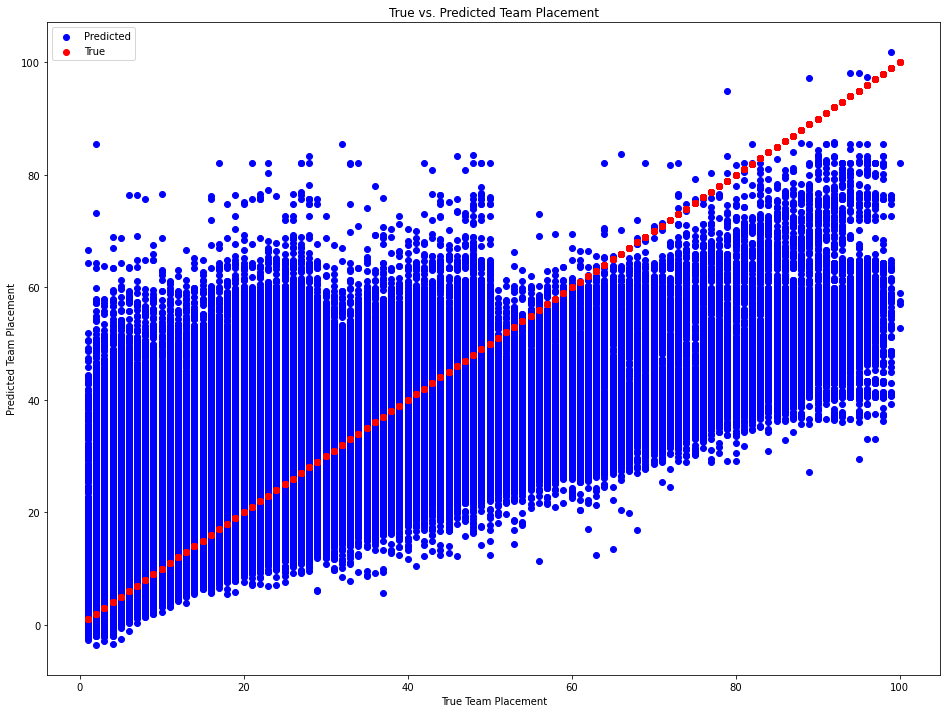

In [ ]:
# Visualize true vs. predicted values using a scatter plot
plt.figure(figsize=(16,12))
plt.scatter(y_test, y_pred_gb, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='True')  # Overlay true values
plt.xlabel('True Team Placement')
plt.ylabel('Predicted Team Placement')
plt.title('True vs. Predicted Team Placement')
plt.legend()
plt.show()
